#  Extracting the cluster labels in heirarchial clustering

we use the `fcluster()` function to extract the cluster labels for intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

**Step 1 and 2:** importing libraries and Load the dataset: 

In [1]:
import pandas as pd

seeds_df = pd.read_csv('seeds-less-rows.csv')

# remove the grain species from the DataFrame, save for later
varieties = list(seeds_df.pop('grain_variety'))

# extract the measurements as a NumPy array
samples = seeds_df.values

**Step 3:** Run the hierarchical clustering of the grain samples

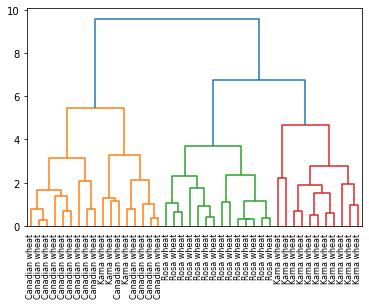

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

mergings = linkage(samples, method='complete')

dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=8,
)
plt.show()

**Step 4:** Import `fcluster` from `scipy.cluster.hierarchy`.

In [11]:
from scipy.cluster.hierarchy import fcluster

**Step 5:** Obtain a flat clustering by using the `fcluster()` function on `mergings`. Specify a maximum height of `6` and the keyword argument `criterion='distance'`.  Assign the result to `labels`.

In [12]:
labels = fcluster(mergings, 6, criterion='distance')

**Step 6:** Create a DataFrame `df` with two columns named `'labels'` and `'varieties'`, using `labels` and `varieties`, respectively, for the column values.

In [13]:
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

**Step 7:** Create a cross-tabulation `ct` between `df['labels']` and `df['varieties']` to count the number of times each grain variety coincides with each cluster label.

In [14]:
ct = pd.crosstab(df['labels'], df['varieties'])

**Step 8:** Display `ct` to see how your cluster labels correspond to the wheat varieties.

In [15]:
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
1,14,3,0
2,0,0,14
3,0,11,0
